In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import fastcluster
import numpy as np
from matplotlib.patches import Rectangle

from scipy.stats import zscore

In [2]:
sum_celllines = pd.read_csv("./Cell_Line_pathways/Pathway_rankchange_sums_celllines.csv")
avg_celllines = pd.read_csv("./Cell_Line_pathways/Pathway_rankchange_means_celllines.csv")

In [3]:
sum_celllines = sum_celllines.set_index("Pathway")
avg_celllines = avg_celllines.set_index("Pathway")

sum_celllines = sum_celllines.drop(["Unnamed: 0"], axis =1)
avg_celllines = avg_celllines.drop(["Unnamed: 0"], axis =1)

sum_celllines.columns = [item.split("label_")[1] for item in sum_celllines.columns]
avg_celllines.columns = [item.split("label_")[1] for item in avg_celllines.columns]

In [4]:
avg_celllines = avg_celllines.drop(["Degradation of Superoxides", "DNA Replication Fork"])

In [5]:
avg_celllines_zscore = avg_celllines.apply(zscore)

In [6]:
palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, as_cmap = True)

In [7]:
g = sns.clustermap(avg_celllines_zscore, figsize =(32,30), cmap = palette_cmap, vmax = 3, vmin = -3, annot_kws={"size": 16})
#plt.savefig("Allpathways_zscored.png", dpi = 400)

In [8]:
row_order = g.dendrogram_row.reordered_ind
column_order = g.dendrogram_col.reordered_ind

In [9]:
ordered_heatmap = avg_celllines_zscore.iloc[row_order, column_order]

In [10]:
ordered_heatmap.to_csv("Pathway_scores_heatmap_ordered_values.csv")

In [9]:
tissue_origin = pd.read_excel("../../Cellosaurus_data/Cellline_tissue_origin.xlsx", names = ["Cancer", "Origin", "Embryonic Layer", "Embyonic"])

In [10]:
sample_references = pd.read_csv("../../AZ_data/Sample_reference_table.csv")
sample_names = sample_references["dsPert"]

sample_data = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
sample_data = sample_data.drop_duplicates(subset = "ID")
sample_data_tissue = sample_data["DI"].tolist()

In [11]:
tissue_type = []
for column in sum_celllines.columns:
    column = column.replace("_", " ")
    if column == "HARA ":
        column = "HARA [Human squamous cell lung carcinoma]"
    elif column == "Sum":
        continue
    cell_line_df = (sample_data[sample_data["ID"] == column])
    item = cell_line_df["DI"].tolist()
    item = item[0]
    if pd.isnull(item):
        tissue_type.append("Unknown") 
    elif item == "[]":
        tissue_type.append("Unknown")
    else:
        item = item.split(";")[2].split("'")[0].strip()
        tissue_type.append(item)

In [13]:
tissue_origin

,Cancer,Origin,Embryonic Layer,Embyonic
0,Bladder carcinoma,Bladder,Endoderm,Endoderm
1,Recurrent bladder carcinoma,Bladder,Endoderm,Endoderm
2,Bladder squamous cell carcinoma,Bladder,Endoderm,Endoderm
3,Plasma cell myeloma,Blood,Mesoderm,Lateral Plate Mesoderm
4,Adult T acute lymphoblastic leukemia,Blood,Mesoderm,Lateral Plate Mesoderm
5,Adult acute myeloid leukemia,Blood,Mesoderm,Lateral Plate Mesoderm
6,Childhood T acute lymphoblastic leukemia,Blood,Mesoderm,Lateral Plate Mesoderm
7,"Chronic myelogenous leukemia, BCR-ABL1 positive",Blood,Mesoderm,Lateral Plate Mesoderm
8,Glioblastoma,Brain,Neural Ectoderm,Neural Ectoderm
9,Astrocytoma,Brain,Neural Ectoderm,Neural Ectoderm


In [15]:
tissue_origin_dict = tissue_origin.set_index("Cancer")["Embryonic Layer"].to_dict()

organ_origin_dict = tissue_origin.set_index("Cancer")["Origin"].to_dict()

cell_origin = [tissue_origin_dict.get(item) for item in tissue_type]
organ_origin = [organ_origin_dict.get(item) for item in tissue_type]

In [16]:
organ_origin_dict

{'Bladder carcinoma': 'Bladder',
 'Recurrent bladder carcinoma': 'Bladder',
 'Bladder squamous cell carcinoma': 'Bladder',
 'Plasma cell myeloma': 'Blood',
 'Adult T acute lymphoblastic leukemia': 'Blood',
 'Adult acute myeloid leukemia': 'Blood',
 'Childhood T acute lymphoblastic leukemia': 'Blood',
 'Chronic myelogenous leukemia, BCR-ABL1 positive': 'Blood',
 'Glioblastoma': 'Brain',
 'Astrocytoma': 'Brain',
 'Gliosarcoma': 'Brain',
 'Invasive ductal carcinoma, not otherwise specified': 'Breast',
 'Ductal breast carcinoma': 'Breast',
 'Inflammatory breast carcinoma': 'Breast',
 'Breast adenocarcinoma': 'Breast',
 'Breast carcinoma': 'Breast',
 'Squamous cell breast carcinoma, acantholytic variant': 'Breast',
 'Colon carcinoma': 'Colon',
 'Colon adenocarcinoma': 'Colon',
 'Renal cell carcinoma': 'Kidney',
 'Papillary renal cell carcinoma': 'Kidney',
 'Clear cell renal cell carcinoma': 'Kidney',
 'Small cell lung carcinoma': 'Lung',
 'Lung adenocarcinoma': 'Lung',
 'Squamous cell lung 

In [17]:
cutoff = 350

In [18]:
discretized_sum_celllines = []
for column in sum_celllines.columns:
    discretized = pd.cut(sum_celllines[column], bins = [-100000, -cutoff, cutoff, 100000], labels = [-1, 0, 1])
    discretized_sum_celllines.append(discretized)
discretized_sum = pd.concat(discretized_sum_celllines,axis =1)
discretized_sum = discretized_sum.astype("int")

In [19]:
discretized_sum_labels = discretized_sum
discretized_sum_labels.loc[len(discretized_sum_labels)] = tissue_type
discretized_sum_labels.loc[len(discretized_sum_labels)] = cell_origin
discretized_sum_labels_T = discretized_sum_labels.transpose()

In [20]:
avg_total_shift = []
avg_average_shift = []
for item in set(discretized_sum_labels_T[100].tolist()):
    tissue_only = discretized_sum_labels_T[discretized_sum_labels_T[100] == item]
    celltype_number = (len(tissue_only))
    tissue_only = tissue_only.drop([100,101], axis =1)
    tissue_only = tissue_only.transpose()
    tissue_percentage = tissue_only.mean(axis =1)
    tissue_only[item] = tissue_only.sum(axis =1)
    tissue_percentage = tissue_percentage.rename(item)
    
    avg_total_shift.append(tissue_only[item])
    avg_average_shift.append(tissue_percentage)
    
avg_total_combined = pd.concat(avg_total_shift, axis =1)
avg_average_combined = pd.concat(avg_average_shift, axis =1)

Text(1650.7499999999998, 0.5, '')

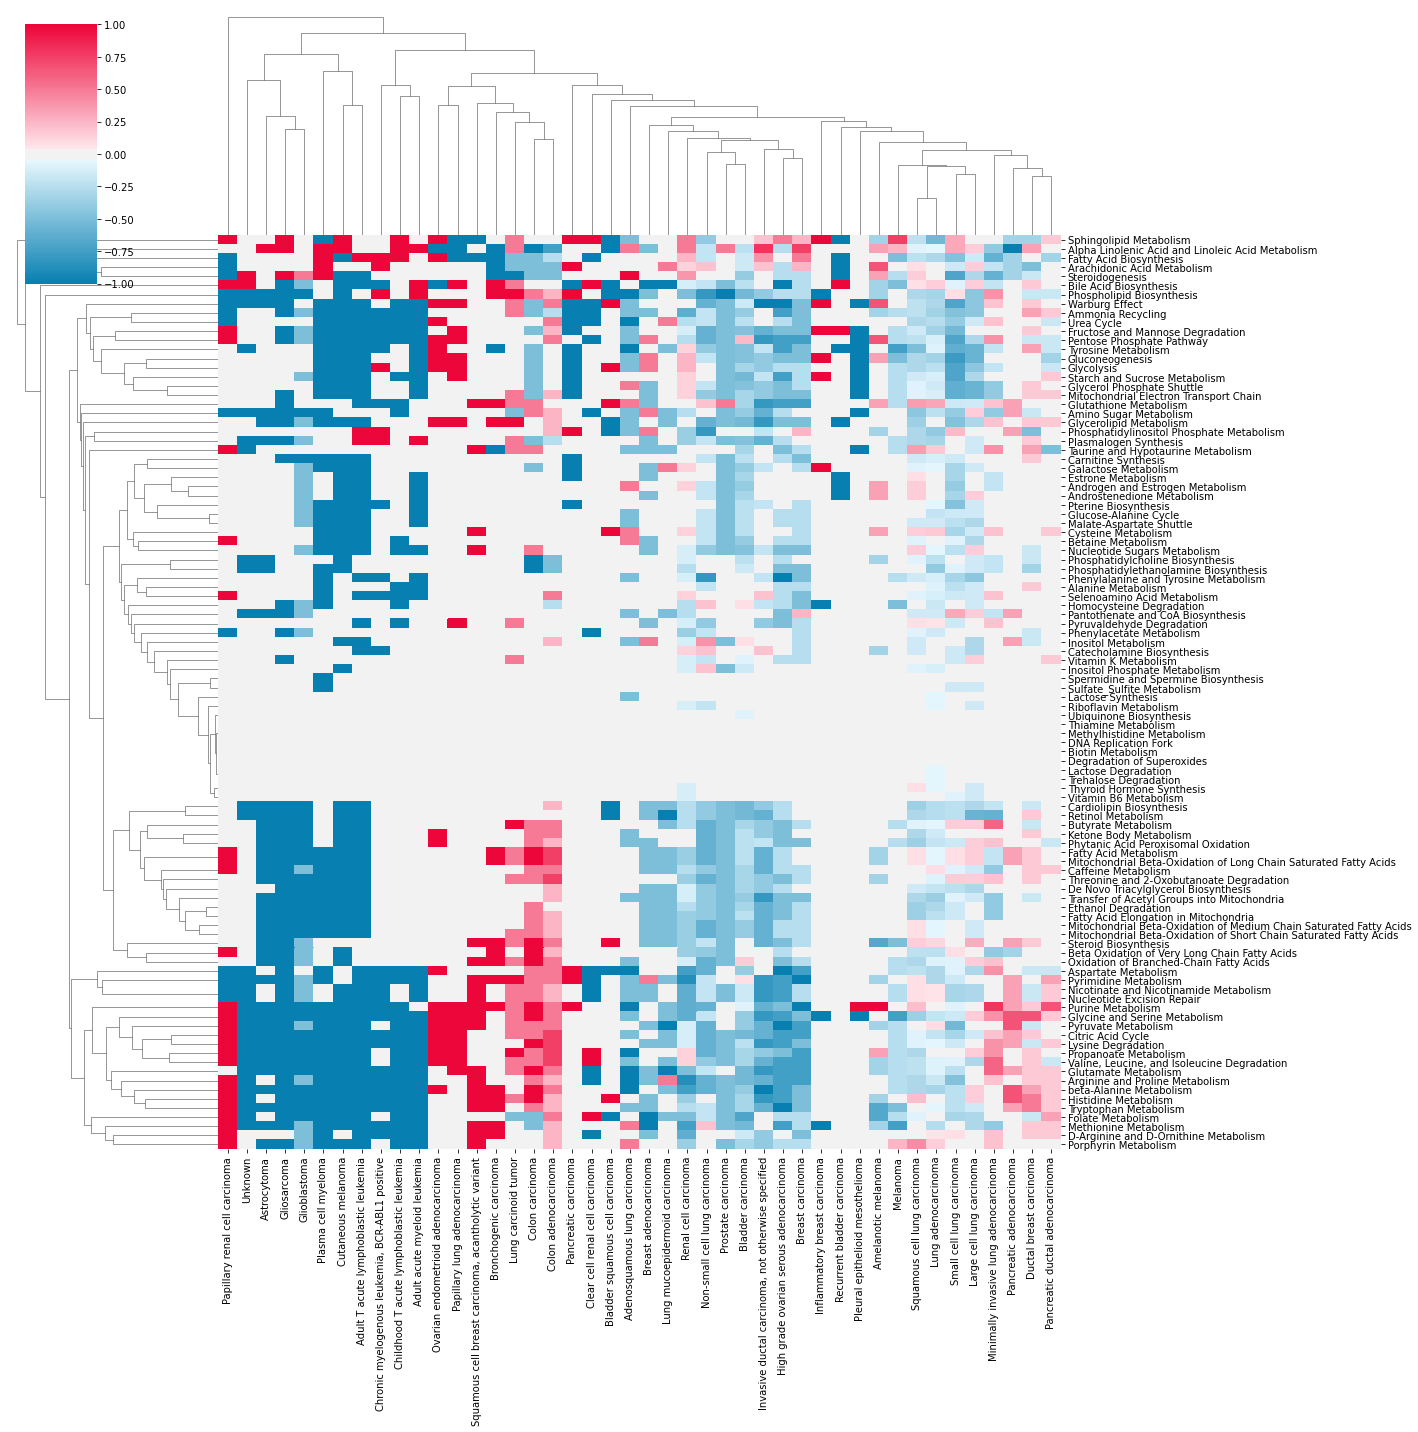

In [21]:
palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, as_cmap = True)
palette_cmap_2 = sns.light_palette("#ed0639", n_colors = 100, as_cmap = True)

g = sns.clustermap(avg_average_combined,cmap = palette_cmap, annot_kws={"size": 14}, yticklabels = True, xticklabels = True
                   , figsize =(20,20), row_cluster = True)
ax = g.ax_heatmap
ax.set_ylabel("")

In [22]:
avg_average_combined["Average"] = abs(avg_average_combined).mean(axis=1)
avg_average_combined = avg_average_combined.sort_values(by = "Average", ascending=False)
avg_average_combined_top = avg_average_combined.head(40)

In [23]:
avg_average_combined_top = avg_average_combined_top.drop("Average", axis =1)

In [24]:
cutoff_2 = 0.40
discretized_averages = []
for column in avg_average_combined.columns:
    discretized = pd.cut(avg_average_combined[column], bins = [-100000, -cutoff_2, cutoff_2, 100000], labels = [-1, 0, 1])
    discretized_averages.append(discretized)
discretized_averages = pd.concat(discretized_averages,axis =1)
discretized_averages = discretized_averages.astype("int")

In [25]:
discretized_averages = discretized_averages.drop("Average", axis =1)
discretized_averages["Total"] = abs(discretized_averages).sum(axis =1)


In [26]:
discretized_averages = discretized_averages.sort_values(by = "Total", ascending = False)

numberofcelltypes = discretized_averages.shape[1]
discretized_averages_top = discretized_averages[discretized_averages["Total"] >= 0.25*numberofcelltypes]

discretized_averages = discretized_averages.drop("Total", axis =1)
discretized_averages_top = discretized_averages_top.drop("Total", axis =1)

In [27]:
discretized_averages_top = discretized_averages_top.drop("Unknown", axis =1)

In [28]:
cell_origin = pd.Series([tissue_origin_dict.get(item) for item in discretized_averages_top.columns.tolist()])
organ_origin = pd.Series([organ_origin_dict.get(item) for item in discretized_averages_top.columns.tolist()])

In [29]:
organ_origin.unique()

array(['Lung', 'Pancreas', 'Colon', 'Kidney', 'Prostate', 'Brain',
       'Breast', 'Skin', 'Bladder', 'Blood', 'Ovary'], dtype=object)

In [30]:
combined_palette = (sns.color_palette("Set3").as_hex()) + (sns.color_palette("Set2").as_hex())
test_palette = ["#fbb4ae", "#b3cde3", "#ccebc5", "#decbe4", "#fed9a6"]
test_palette_2 = ["#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854"]

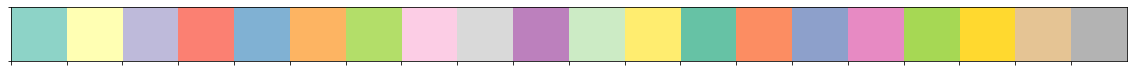

In [31]:
sns.palplot(combined_palette)

In [32]:
mapping = dict(zip(cell_origin.unique(), test_palette_2))
column_colors = cell_origin.map(mapping)

In [38]:
column_colors.values

array(['#66c2a5', '#66c2a5', '#66c2a5', '#66c2a5', '#fc8d62', '#66c2a5',
       '#8da0cb', '#66c2a5', '#fc8d62', '#e78ac3', '#e78ac3', '#66c2a5',
       '#66c2a5', '#fc8d62', '#66c2a5', '#fc8d62', '#fc8d62', '#fc8d62',
       '#66c2a5', '#66c2a5', '#e78ac3', '#fc8d62', '#e78ac3', '#66c2a5',
       '#66c2a5', '#fc8d62', '#e78ac3', '#66c2a5', '#66c2a5', '#66c2a5',
       '#66c2a5', '#8da0cb', '#e78ac3', '#fc8d62', '#e78ac3', '#e78ac3',
       '#66c2a5', '#8da0cb', '#e78ac3', '#66c2a5', '#66c2a5', '#66c2a5',
       '#fc8d62'], dtype=object)

In [33]:
mapping2 = dict(zip(organ_origin.unique(), combined_palette))
column_colors2 = organ_origin.map(mapping2)

In [35]:
discretized_averages_top.to_csv("Pathways_celllinetypes_correlation_shorthouse.csv")

[Text(0.5, 0, 'Breast adenocarcinoma'),
 Text(1.5, 0, 'Adenosquamous lung carcinoma'),
 Text(2.5, 0, 'Plasma cell myeloma'),
 Text(3.5, 0, 'Chronic myelogenous leukemia, BCR-ABL1 positive'),
 Text(4.5, 0, 'Adult acute myeloid leukemia'),
 Text(5.5, 0, 'Breast carcinoma'),
 Text(6.5, 0, 'Childhood T acute lymphoblastic leukemia'),
 Text(7.5, 0, 'Lung mucoepidermoid carcinoma'),
 Text(8.5, 0, 'High grade ovarian serous adenocarcinoma'),
 Text(9.5, 0, 'Non-small cell lung carcinoma'),
 Text(10.5, 0, 'Astrocytoma'),
 Text(11.5, 0, 'Invasive ductal carcinoma, not otherwise specified'),
 Text(12.5, 0, 'Gliosarcoma'),
 Text(13.5, 0, 'Glioblastoma'),
 Text(14.5, 0, 'Adult T acute lymphoblastic leukemia'),
 Text(15.5, 0, 'Prostate carcinoma'),
 Text(16.5, 0, 'Cutaneous melanoma'),
 Text(17.5, 0, 'Colon carcinoma'),
 Text(18.5, 0, 'Lung carcinoid tumor'),
 Text(19.5, 0, 'Papillary renal cell carcinoma'),
 Text(20.5, 0, 'Papillary lung adenocarcinoma'),
 Text(21.5, 0, 'Colon adenocarcinoma'),
 Te

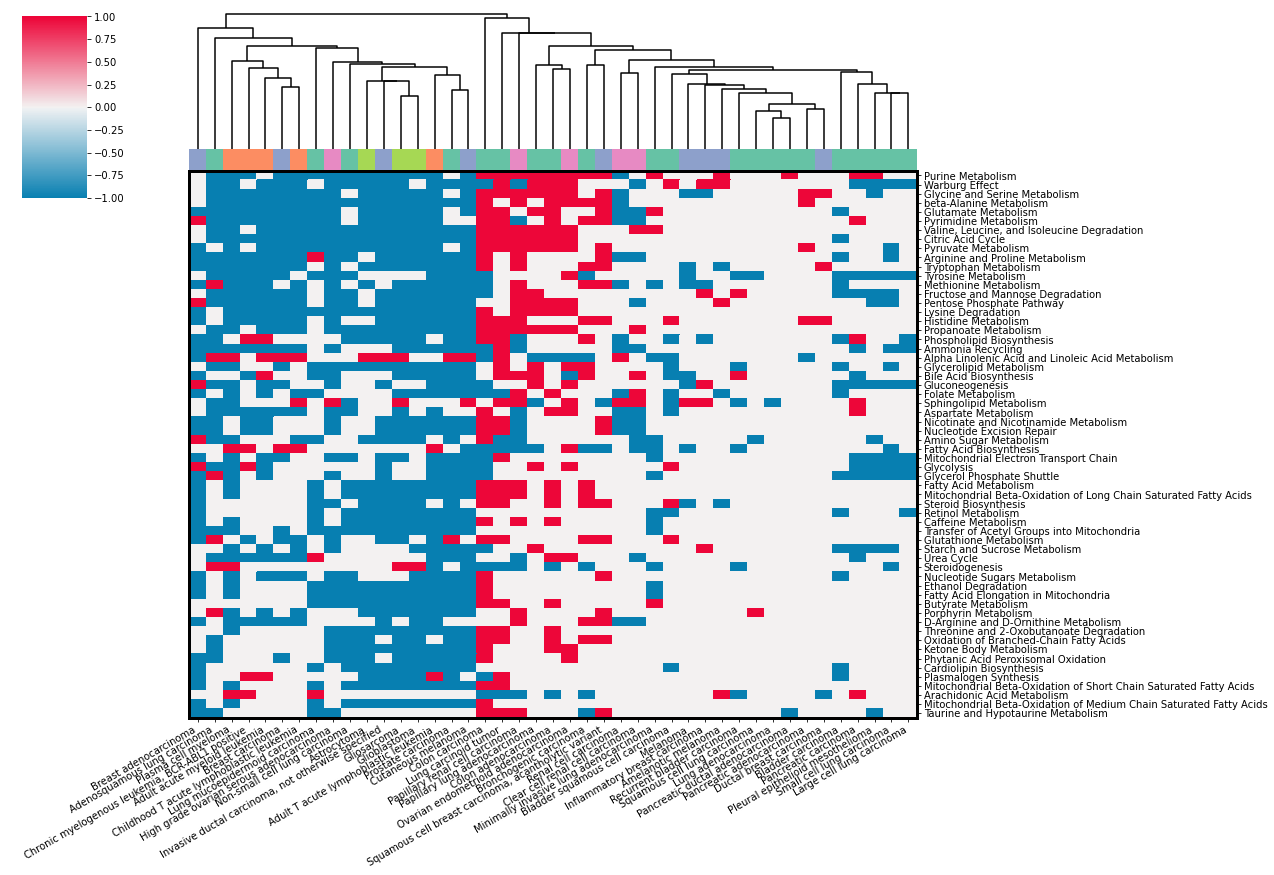

In [52]:
palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, as_cmap = True)
palette_cmap_2 = sns.light_palette("#ed0639", n_colors = 100, as_cmap = True)

g = sns.clustermap(discretized_averages_top,cmap = palette_cmap, annot_kws={"size": 20}, yticklabels = True, xticklabels = True
                   , figsize =(18,14), row_cluster = False, col_colors=column_colors.values,
tree_kws=dict(linewidths=1.5, colors=("k")))
ax = g.ax_heatmap
ax.set_ylabel("")

#ax.axhline(0, color = "k", lw = 3)
#ax.axhline(len(discretized_averages_top.index), color = "k", lw = 3)
#ax.axvline(0, color = "k", lw = 3)
#ax.axvline(len(discretized_averages_top.columns), color = "k", lw = 3)

ax.add_patch(Rectangle((0, 0), len(discretized_averages_top.columns), len(discretized_averages_top.index)
                       , fill=False, edgecolor='black', lw=3, clip_on = False))

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=30, ha = "right")

#plt.savefig("Embryonic_origin_heatmap_pathways_percellline.pdf")

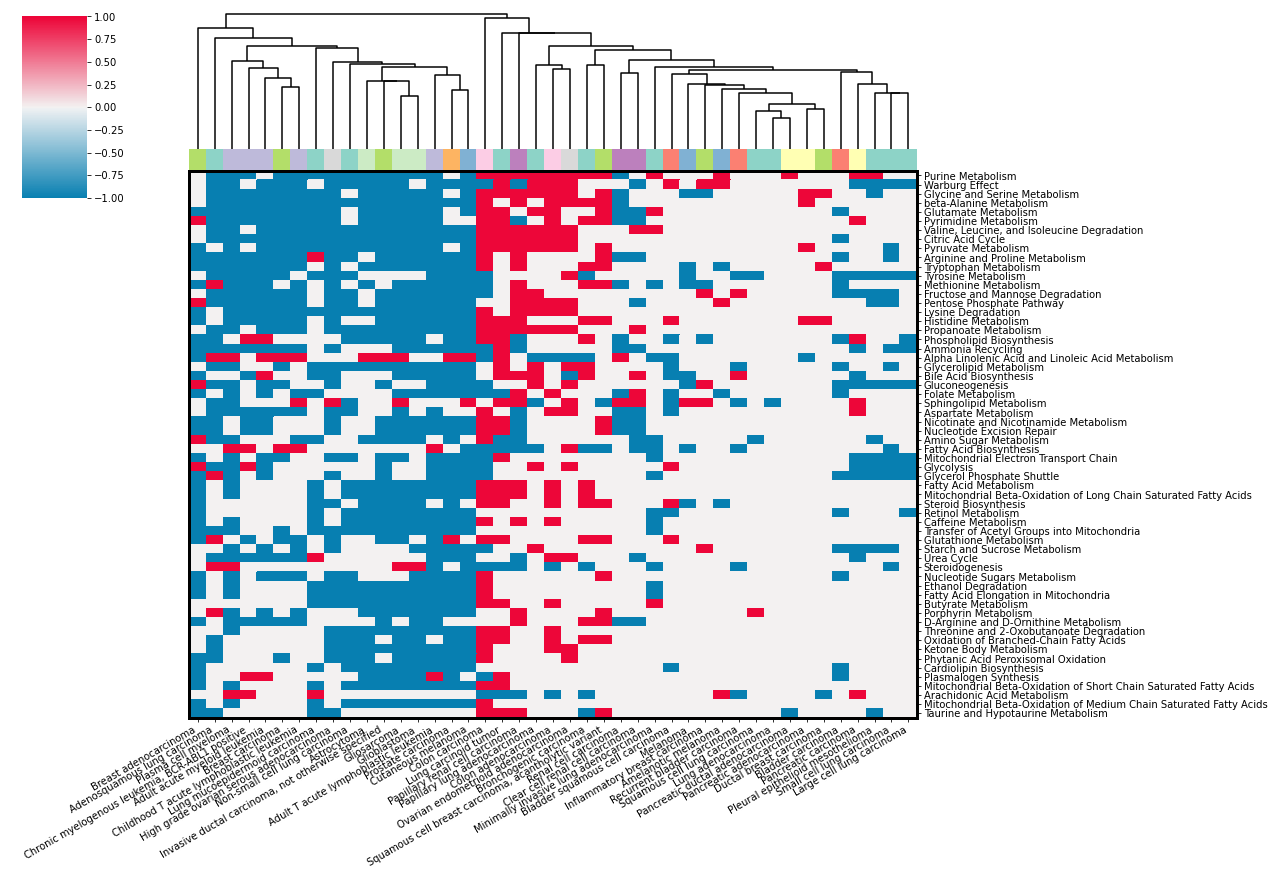

In [53]:
palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, as_cmap = True)
palette_cmap_2 = sns.light_palette("#ed0639", n_colors = 100, as_cmap = True)

g = sns.clustermap(discretized_averages_top,cmap = palette_cmap, annot_kws={"size": 20}, yticklabels = True, xticklabels = True
                   , figsize =(18,14), row_cluster = False, col_colors=column_colors2.values,
tree_kws=dict(linewidths=1.5, colors=("k")))
ax = g.ax_heatmap
ax.set_ylabel("")

#ax.axhline(0, color = "k", lw = 3)
#ax.axhline(len(discretized_averages_top.index), color = "k", lw = 3)
#ax.axvline(0, color = "k", lw = 3)
#ax.axvline(len(discretized_averages_top.columns), color = "k", lw = 3)

ax.add_patch(Rectangle((0, 0), len(discretized_averages_top.columns), len(discretized_averages_top.index)
                       , fill=False, edgecolor='black', lw=3, clip_on = False))

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=30, ha = "right")

plt.savefig("Tissue_origin_heatmap_pathways_percellline.pdf")